In [11]:
import pyrealsense2 as rs
import numpy as np
import matplotlib.pyplot as plt

test_name = "03_07_2024_projector_on_toolbox"


In [ ]:


# Create a context object. This object owns the handles to all connected realsense devices
#https://github.com/IntelRealSense/librealsense/issues/4449
ctx = rs.context()

config = rs.config()
config.enable_stream(rs.stream.depth, 1280, 720, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 1280, 720, rs.format.bgr8, 30)

pipeline = rs.pipeline()
profile = pipeline.start(config)
color_sensor = profile.get_device().query_sensors()[1]
color_sensor.set_option(rs.option.enable_auto_exposure, 1)
depth_sensor = profile.get_device().query_sensors()[0]
depth_sensor.set_option(rs.option.enable_auto_exposure, 1)




AttributeError: type object 'pyrealsense2.pyrealsense2.option' has no attribute 'auto_exposure_enable'

In [13]:
# https://github.com/IntelRealSense/librealsense/tree/master/wrappers/python
# https://github.com/IntelRealSense/librealsense/issues/5502
test=True
try:
    while test:
        # Create a pipeline object. This object configures the streaming camera and owns it's handle
        frames = pipeline.wait_for_frames()
        depth = frames.get_depth_frame()
        color = frames.get_color_frame() 
        if not depth: continue

        
        depth = frames.get_depth_frame()
        depth_data = depth.as_frame().get_data()
        color_np =np.asanyarray(color.get_data())
        depth_np = np.asanyarray(depth_data)
        print(depth_np)
        test = False

finally:
    pipeline.stop()


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


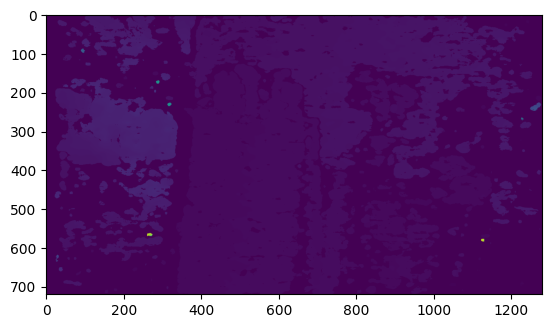

In [14]:
plt.imshow(depth_np)

In [15]:
depth_np.max()

np.uint16(47338)

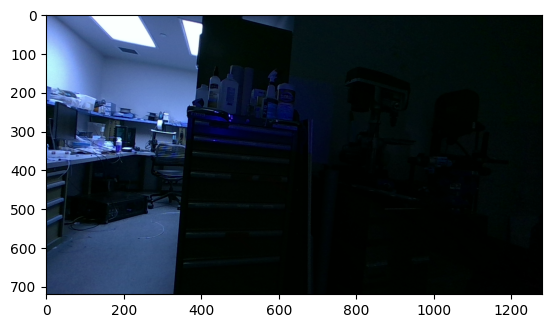

In [16]:
plt.imshow(color_np)

In [17]:
color_np.shape

(720, 1280, 3)

In [18]:
adsfasdfasdfas

NameError: name 'adsfasdfasdfas' is not defined

In [19]:
color_np.astype(np.float64).tofile(f"./data/realsense_tests/{test_name}-color.bin")

In [20]:
depth_np.astype(np.float32).tofile(f"./data/realsense_tests/{test_name}-depth.bin")

In [21]:
with open(f"./data/realsense_tests/{test_name}-shape.txt", "w") as file:
  file.write(f"""color shape: \t {color_np.shape}
depth shape: \t {depth_np.shape}""")

In [ ]:
afasfasdfasd

# luminant map

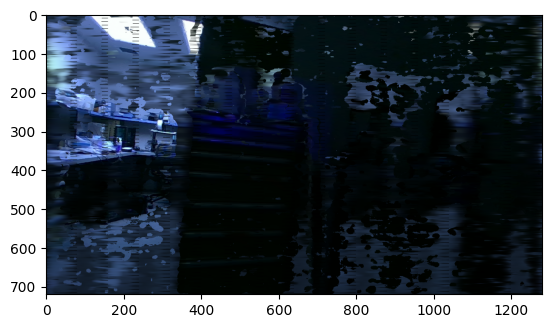

In [24]:
a_c_new = np.fromfile(f"./data/realsense_tests/{test_name}-lim-99.bin").astype(int)
a_c_new = a_c_new.reshape((720, 1280, 3))
plt.imshow(a_c_new)